In [1]:
from lib import *

Pipeline = pipeline.Pipeline
RegressionValidator = pipeline.RegressionValidator

DatasetProvider = provider.DatasetProvider
DatasetUploader = provider.DatasetUploader

In [2]:
import warnings

from sklearn.exceptions import ConvergenceWarning, DataConversionWarning

warnings.filterwarnings('ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

/tmp/ipykernel_25630/2008958054.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


## Load train, test sets, idx's

In [4]:
import pickle

def load_pickle(dataset, name):
    dataset.to_pickle(name + '.pkl')

def from_pickle(path):
    with open(path, 'rb') as reader:
        return pickle.load(reader)

In [5]:
task_df = {}

task_df['test'] = from_pickle('tmp/task_df_test.pkl')
task_df['train'] = from_pickle('tmp/task_df_train.pkl')

In [6]:
serieses_month_cnt = from_pickle('tmp/series_cnt.pkl')

In [22]:
baseline_train = from_pickle('tmp/train_extracted.pkl')
validation_set = from_pickle('tmp/baseline_extracted.pkl')

In [23]:
full_train = pd.concat(baseline_train.values(), axis=1)
full_test = pd.concat(baseline_train.values(), axis=1)

## Feature evaluation

In [9]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

evaluation_forest = RandomForestRegressor(n_jobs=-1, max_depth=40)

In [24]:
train_x = full_train.drop(['target'], axis=1).fillna(0)
train_y = full_train.loc[:, ['target']]

test_x = full_test.drop(['target'], axis=1).fillna(0)
test_y = full_test.loc[:, ['target']]

### Primary feature selection

In [14]:
evaluation_forest.fit(train_x, train_y)

RandomForestRegressor(max_depth=20, n_jobs=-1,
                      random_state=RandomState(MT19937) at 0x7F5492D0DA40)

In [26]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(evaluation_forest, train_x, train_y)

In [29]:
# with open('tmp/baseline_rfr_train_fitted.pkl', 'wb+') as writer:
#     pickle.dump(evaluation_forest, writer)

In [33]:
perm_importance['importances_mean']

1.8261089214442108

In [32]:
test_y.target.values

array([0., 0., 0., ..., 0., 0., 0.])

<AxesSubplot:xlabel='importance', ylabel='column_name'>

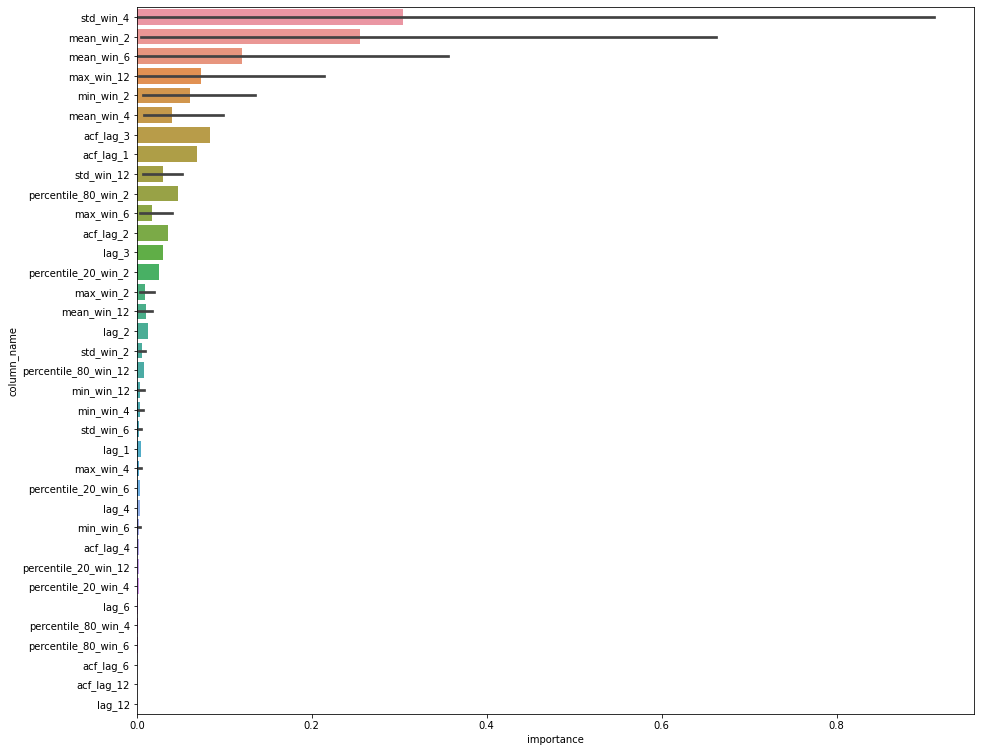

In [43]:
_, axs = plt.subplots(1, 1, figsize=(15, 13))

feature_impotrance = pd.DataFrame({'column_name': train_x.columns, 'importance': (perm_importance['importances_mean'])}).set_index('column_name').sort_values('importance', ascending=False)
valid_features = feature_impotrance.head(17).index.values

sns.barplot(data=feature_impotrance.reset_index(), x='importance', y='column_name', ax=axs)

## Basic models

In [15]:
evaluation_forest.feature_importances_

array([0.00153002, 0.01231688, 0.01441744, 0.00463865, 0.00344835,
       0.0011577 , 0.03416113, 0.03770991, 0.07668723, 0.00500733,
       0.0004964 , 0.000599  , 0.03751018, 0.00437773, 0.00835457,
       0.02492244, 0.02961535, 0.02008232, 0.03225414, 0.10959842,
       0.00863718, 0.00909556, 0.0068956 , 0.00403478, 0.01108362,
       0.00457087, 0.00158574, 0.01602302, 0.00679904, 0.00229636,
       0.00715121, 0.0061674 , 0.00050426, 0.0347489 , 0.00532556,
       0.01402397, 0.0277309 , 0.00198462, 0.03077957, 0.01213531,
       0.03258301, 0.01009182, 0.00634643, 0.00296934, 0.07339471,
       0.00895743, 0.00639254, 0.0095533 , 0.02979017, 0.02065828,
       0.0073907 , 0.00693569, 0.00764885, 0.01774965, 0.01252247,
       0.00702586, 0.01470562, 0.00519062, 0.00330828, 0.00742764,
       0.00064598, 0.00080581, 0.00870025, 0.00854667, 0.00110614,
       0.00835789, 0.00445832, 0.00627786])

## Advanced model tuning

In [ ]:
sns.barplot(evaluation_forest.fa)

## Result exlopration

## Submission estimation